## this notebook is basically the same as mapping_0809_3D_2D_interpolation_xyz, the only difference is that when it produces 3D plots, the z values are offseted so that the floor corresponds to z=0 (for presentation purpose)

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import scipy


In [2]:
df1 = pd.read_csv('Mapping_0809_RUN1.csv')
df2 = pd.read_csv('Mapping_0809_RUN2.csv')
df3 = pd.read_csv('Mapping_0809_RUN3.csv')
df4 = pd.read_csv('Mapping_0809_RUN4.csv')

df_all0 = df1.append(df2)
df_all1  = df_all0.append(df3)
df_all  = df_all1.append(df4)

df_all['x'] = - df_all.u + 10.25
df_all['y'] = -df_all.w
df_all['z'] = df_all.v -1.25
df_all['B_x'] = -df_all['B_u']
df_all['B_y'] = -df_all['B_w']
df_all['B_z'] = df_all['B_v']

In [3]:
df_all.to_csv('data_csv/rawdata_all.csv')
df_plat0 = df_all[df_all.z>0]
df_plat0.to_csv('data_csv/rawdata_all_z_above_platform.csv')

In [4]:
df_all[:2]

,cycle,time_start,time_end,u,v,w,B_u,dB_u,B_v,dB_v,B_w,dB_w,x,y,z,B_x,B_y,B_z
0,0,1.565393e+09,1.565393e+09,-87.95,-146.13,-192.75,0.501304,0.000271,1.221652,0.000049,1.236878,0.000113,98.2,192.75,-147.38,-0.501304,-1.236878,1.221652
1,1,1.565393e+09,1.565393e+09,-87.95,-106.13,-192.75,0.594004,0.000063,1.255494,0.000049,1.038404,0.000093,98.2,192.75,-107.38,-0.594004,-1.038404,1.255494


In [5]:
u_max = np.max(df_all.u)
v_max = np.max(df_all.v)
w_max = np.max(df_all.w)
u_min = np.min(df_all.u)
v_min = np.min(df_all.v)
w_min = np.min(df_all.w)

x_max = np.max(df_all.x)
z_max = np.max(df_all.z)
y_max = np.max(df_all.y)
x_min = np.min(df_all.x)
z_min = np.min(df_all.z)
y_min = np.min(df_all.y)

In [6]:
v_floors = df_all1.v.unique()

v_all = df_all.v.unique()
w_all = df_all.w.unique()
u_all = df_all.u.unique()
print len(v_all)
print len(u_all)

print len(w_all)
# z_floors = df_all.z.unique()

z_all = df_all.z.unique()
y_all = df_all.y.unique()
x_all = df_all.x.unique()
print len(z_all)
print len(x_all)
print len(y_all)

11
10
14
11
10
14


#### Horizontal cuts


In [7]:
# v_cut = v_floors[6]
idx_cut = 10
v_cut=v_all[idx_cut]

df_all_sub = df_all[df_all.v==v_cut]
print df_all_sub.index.size
u_min, u_max= np.min(df_all_sub.u), np.max(df_all_sub.u)
w_min, w_max= np.min(df_all_sub.w), np.max(df_all_sub.w)
NL = 50 # default os 50

u_dense, w_dense = np.meshgrid(np.linspace(u_min, u_max, NL), np.linspace(w_min,w_max, NL))


import scipy.interpolate as interp
Bu_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bu_dense = Bu_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bv_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_v, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bv_dense = Bv_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bw_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_w, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bw_dense = Bw_rbf(u_dense, w_dense)  # not really a function, but a callable class instance



40


In [93]:
# df_all_sub[['u','w', 'B_u','B_v','B_w']]

<IPython.core.display.Javascript object>


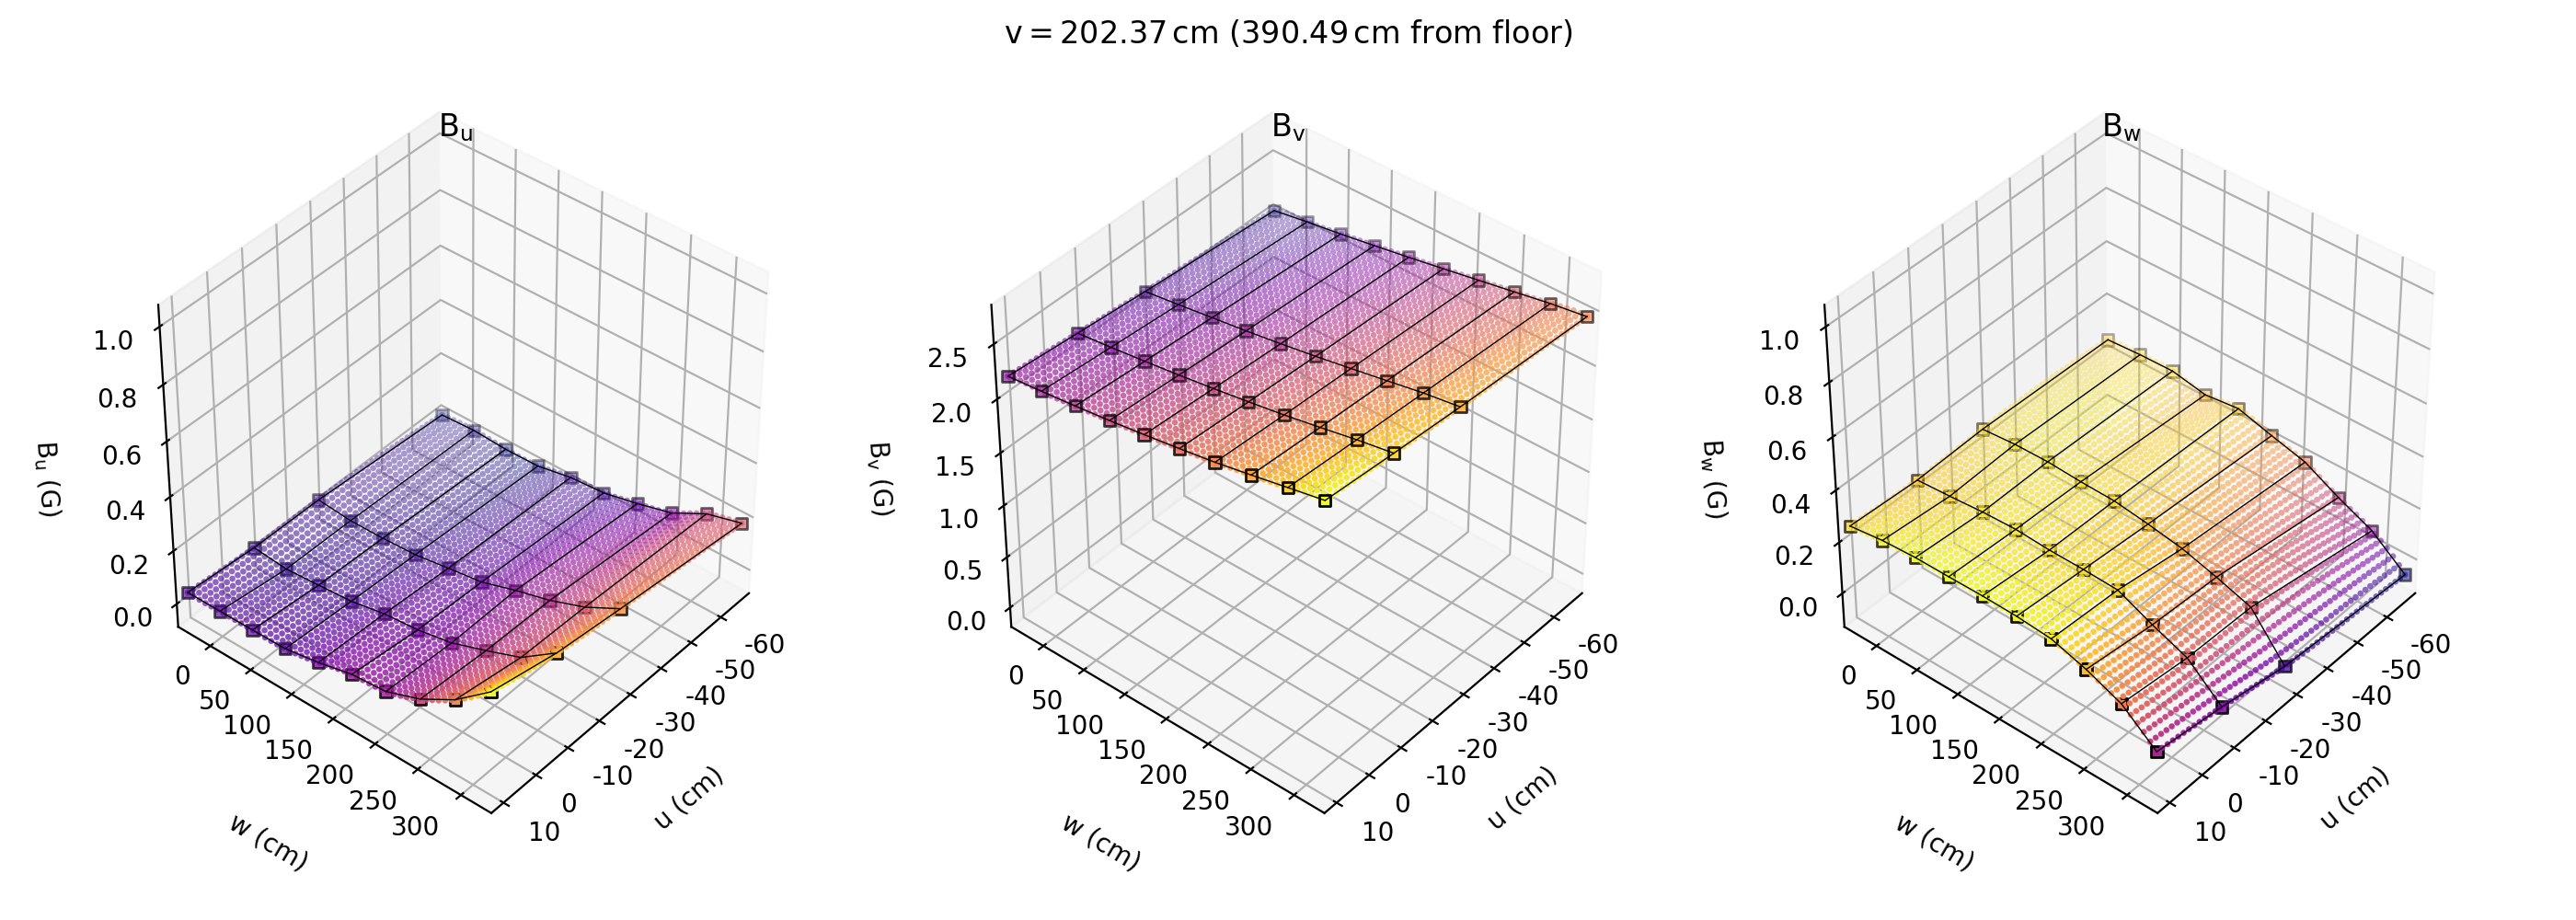

In [94]:
fig1 = plt.figure(facecolor='white', figsize=(14,5))

ax1 = fig1.add_subplot(131, projection='3d')
ax2 = fig1.add_subplot(132, projection='3d')
ax3 = fig1.add_subplot(133, projection='3d')


# ax1.tick_params(axis='x', rotation=-15, labelsize=10)
# ax1.tick_params(axis='y', rotation=-25, labelsize=10)
# ax1.tick_params(axis='y', rotation=-30, labelsize=11)
# ax1.set_ylim3d(np.min(df1_sub.v)-15,np.max(df1_sub.v)+5)



for axi in [ax1, ax2, ax3]:
    axi.view_init(elev=40., azim=40)
    
    axi.set_xlim3d(u_min,u_max)
    axi.set_ylim3d(w_min,w_max)    
#    prarmeters for elev=40., azim=40)
    axi.set_xticklabels(ax1.get_xticks(), 
                    verticalalignment='baseline',
                    horizontalalignment='left')
    axi.set_yticklabels(ax1.get_yticks(), 
                    verticalalignment='baseline',
                    horizontalalignment='right')    
#     axi.set_xticklabels(ax1.get_xticks(), rotation=50,
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax1.get_yticks(), 
#                     verticalalignment='baseline',rotation=-25,
#                     horizontalalignment='left')

    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
                                  

    axi.set_xlabel('$\mathsf{u}$ (cm)', rotation=7, labelpad=10)
    axi.set_ylabel('$\mathsf{w}$ (cm)',  labelpad=15)
    
for wi in w_all:
    ax1.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_u, '-', c='black', lw=.5)
    ax2.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_v, '-', c='black', lw=.5)
    ax3.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_w, '-', c='black', lw=.5)
    
#     ax1.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_u, '-', c='black', lw=.5)
#     ax2.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_v, '-', c='black', lw=.5)
#     ax3.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_w, '-', c='black', lw=.5)
for ui in u_all:
#     ax1.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_u, '-', c='black', lw=.5)
#     ax2.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_v, '-', c='black', lw=.5)
#     ax3.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_w, '-', c='black', lw=.5)
    ax1.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_u, '-', c='black', lw=.5)
    ax2.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_v, '-', c='black', lw=.5)
    ax3.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_w, '-', c='black', lw=.5)


# sc1 = ax1.scatter(df1_sub.w, df1_sub.v, df1_sub.B_u,c=df1_sub.B_u, edgecolor='',marker='o', cmap=cm.plasma)
sc1_int = ax1.scatter(u_dense, w_dense, Bu_dense,  c=np.concatenate(Bu_dense), marker='.', lw=.1, cmap=cm.plasma)
sc2_int = ax2.scatter(u_dense, w_dense, Bv_dense,  c=np.concatenate(Bv_dense), marker='.', lw=.1, cmap=cm.plasma)
sc3_int = ax3.scatter(u_dense, w_dense, Bw_dense,  c=np.concatenate(Bw_dense), marker='.', lw=.1, cmap=cm.plasma)

sc1 = ax1.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_u,c=df_all_sub.B_u, edgecolor='black',marker='s', cmap=cm.plasma)
sc2 = ax2.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_v,c=df_all_sub.B_v, edgecolor='black',marker='s', cmap=cm.plasma)
sc3 = ax3.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_w,c=df_all_sub.B_w, edgecolor='black',marker='s', cmap=cm.plasma)


ax1.set_title('$\mathsf{B_u}$') 
ax1.set_zlabel('$\mathsf{B_u}$ (G)', rotation=180, labelpad=10)


ax2.set_zlabel('$\mathsf{B_v}$ (G)', rotation=180, labelpad=10)
ax2.set_title('$\mathsf{B_v}$')

ax3.set_zlabel('$\mathsf{B_w}$ (G)', rotation=180, labelpad=10)
ax3.set_title('$\mathsf{B_w}$')

fig1.suptitle('$\mathsf{v=%.2f\,cm\,\, (%.2f\,cm\,\,from\,\,floor  )}$'%(v_cut,v_cut+188.12))

fig1.tight_layout(pad=3,rect=[0, 0, 1, 0.99])

fig1.savefig('plots_0809_int_v/Mapping0809_v_id_%02d%.2f.png' %(idx_cut,v_cut))

### Vertical cuts

In [8]:
# z_cut = z_floors[6]
idx_ucut = 2
x_cut=x_all[idx_ucut]

df_all_sub = df_all[df_all.x==x_cut]
print df_all_sub.index.size


z_min, z_max= np.min(df_all_sub.z), np.max(df_all_sub.z)
y_min, y_max= np.min(df_all_sub.y), np.max(df_all_sub.y)
NL = 50 # default os 50

z_dense, y_dense = np.meshgrid(np.linspace(z_min, z_max, NL), np.linspace(y_min,y_max, NL))


import scipy.interpolate as interp
# Bx_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bx_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation

Bx_dense = Bx_rbf(z_dense, y_dense)  # not really a function, but a callable class instance


Bz_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_z, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bz_dense = Bz_rbf(z_dense, y_dense)  # not really a function, but a callable class instance

By_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_y, function='cubic', smooth=0)  # default smooth=0 for interpolation
By_dense = By_rbf(z_dense, y_dense)  # not really a function, but a callable class instance



109


<IPython.core.display.Javascript object>


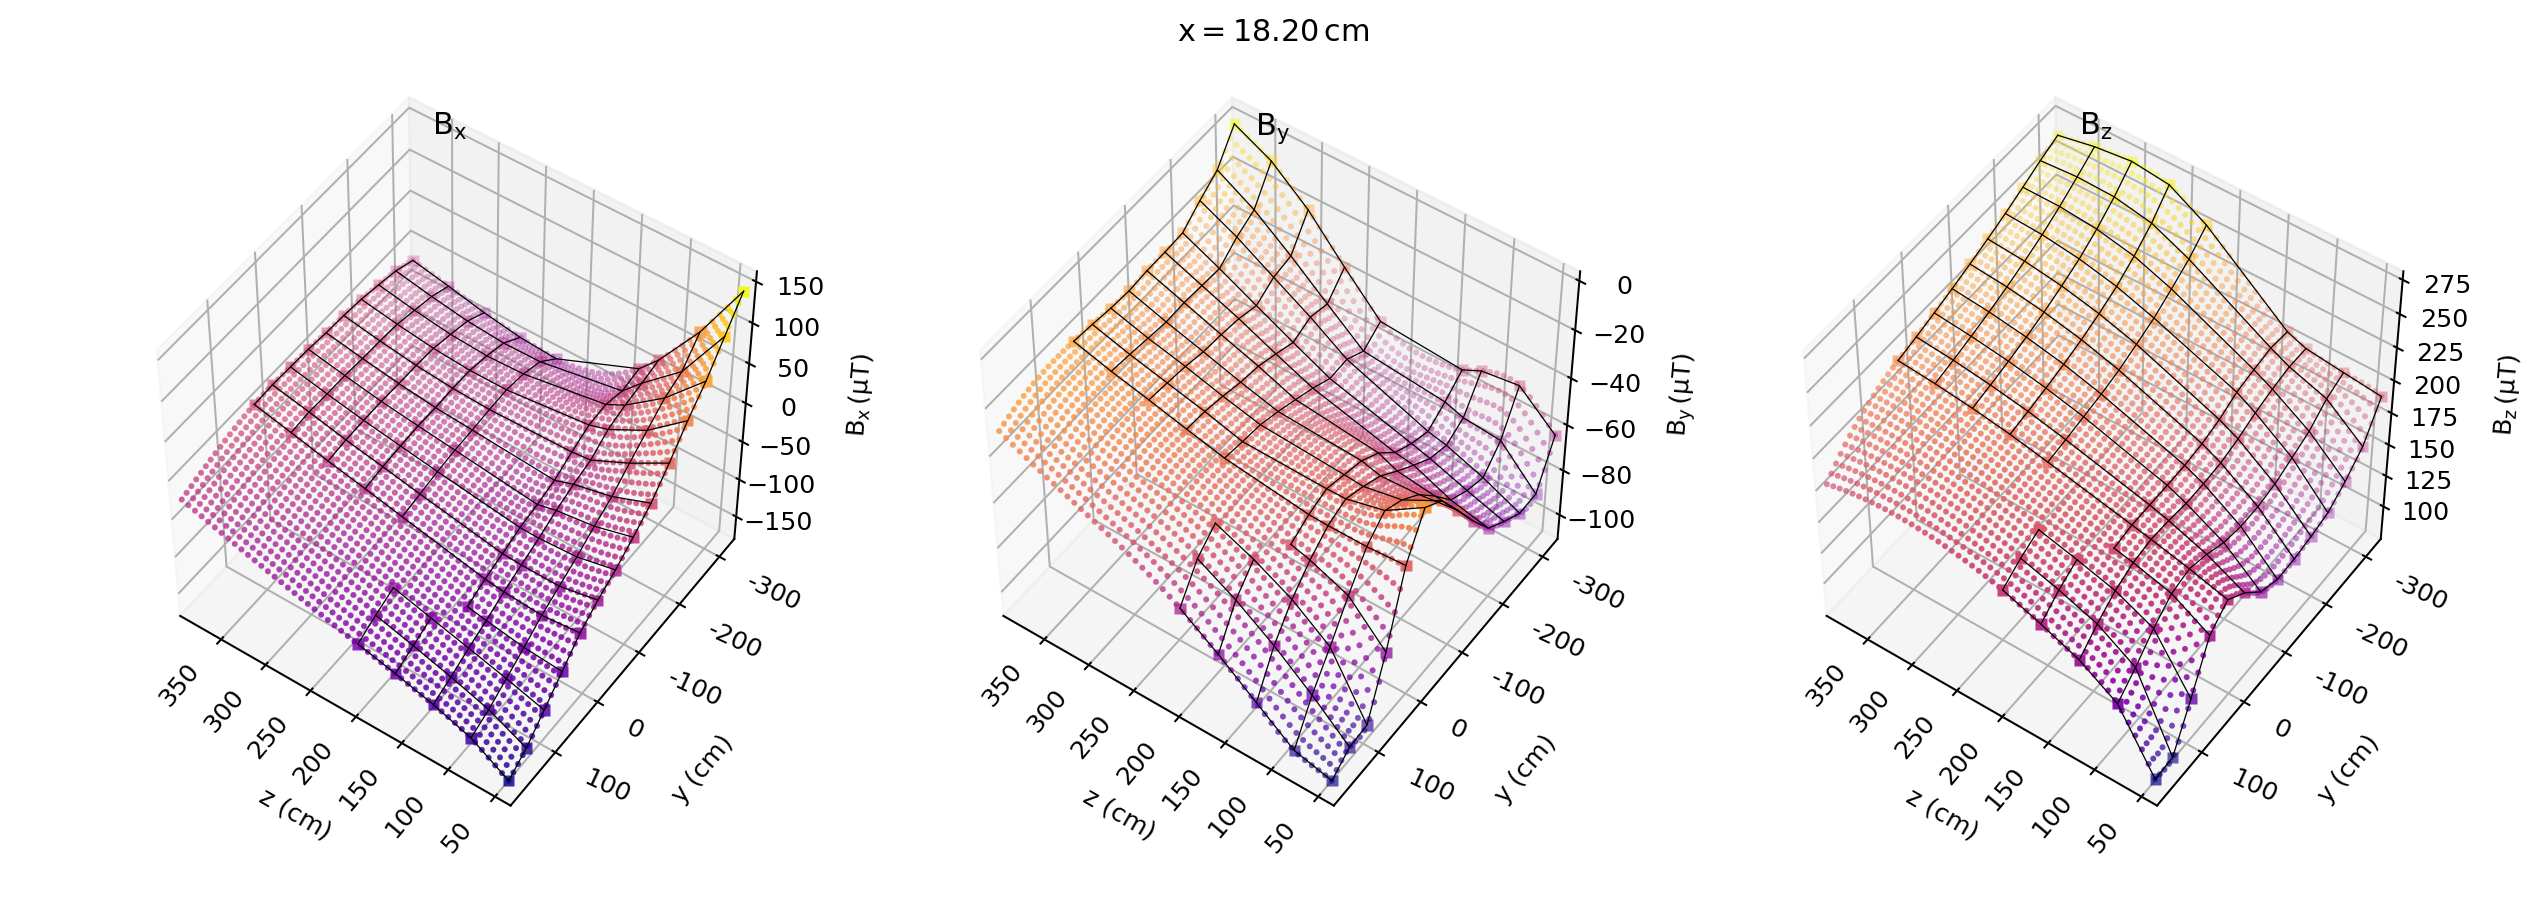

In [16]:
fig2 = plt.figure(facecolor='white', figsize=(14,5))

ax4 = fig2.add_subplot(131, projection='3d')
ax5 = fig2.add_subplot(132, projection='3d')
ax6 = fig2.add_subplot(133, projection='3d')


# ax4.tick_params(axis='x', rotation=-15, labelsize=10)
# ax4.tick_params(axis='y', rotation=-25, labelsize=10)
# ax4.tick_params(axis='y', rotation=-30, labelsize=11)
# ax4.set_ylim3d(np.min(df1_sub.z)-15,np.max(df1_sub.z)+5)



for axi in [ax4, ax5, ax6]:
    axi.view_init(elev=50., azim=125)
    
    axi.set_xlim3d(z_min+188.12,z_max+188.12) # this is for a purpose to produce plots with z=0 : floor
    axi.set_ylim3d(y_min,y_max)    
# #    prarmeters for elev=40., azim=40)
#     axi.set_xticklabels(ax4.get_xticks(), 
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax4.get_yticks(), 
#                     verticalalignment='baseline',
#                     horizontalalignment='right')    
#    prarmeters for elev=-148., azim=30)
    axi.set_xticklabels(ax4.get_xticks(),  rotation=50,
                    verticalalignment='baseline',
                    horizontalalignment='right')
    axi.set_yticklabels(ax4.get_yticks(),  rotation=-25,
                    verticalalignment='baseline',
                    horizontalalignment='left')    
#     axi.set_xticklabels(ax4.get_xticks(), rotation=50,
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax4.get_yticks(), 
#                     verticalalignment='baseline',rotation=-25,
#                     horizontalalignment='left')

    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
                                  

    axi.set_xlabel('$\mathsf{z}$ (cm)', rotation=7, labelpad=10)
    axi.set_ylabel('$\mathsf{y}$ (cm)',  labelpad=15)
    
for yi in y_all:
    ax4.plot(df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].z+188.12,df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].y, df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].B_x*100, '-', c='black', lw=.5)
    ax6.plot(df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].z+188.12,df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].y, df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].B_z*100, '-', c='black', lw=.5)
    ax5.plot(df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].z+188.12,df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].y, df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].B_y*100, '-', c='black', lw=.5)
    
for zi in z_all:
    ax4.plot(df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].z+188.12,df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].y, df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].B_x*100, '-', c='black', lw=.5)
    ax6.plot(df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].z+188.12,df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].y, df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].B_z*100, '-', c='black', lw=.5)
    ax5.plot(df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].z+188.12,df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].y, df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].B_y*100, '-', c='black', lw=.5)


# sc4 = ax4.scatter(df1_sub.y, df1_sub.z, df1_sub.B_x,c=df1_sub.B_x, edgecolor='',marker='o', cmap=cm.plasma)

sc4_int = ax4.scatter(z_dense+188.12, y_dense, Bx_dense*100,  c=np.concatenate(Bx_dense)*100, marker='.', lw=.1, cmap=cm.plasma)
sc5_int = ax6.scatter(z_dense+188.12, y_dense, Bz_dense*100,  c=np.concatenate(Bz_dense)*100, marker='.', lw=.1, cmap=cm.plasma)
sc6_int = ax5.scatter(z_dense+188.12, y_dense, By_dense*100,  c=np.concatenate(By_dense)*100, marker='.', lw=.1, cmap=cm.plasma)

sc4 = ax4.scatter(df_all_sub.z+188.12, df_all_sub.y, df_all_sub.B_x*100,c=df_all_sub.B_x*100, edgecolor='',marker='s', cmap=cm.plasma)
sc5 = ax6.scatter(df_all_sub.z+188.12, df_all_sub.y, df_all_sub.B_z*100,c=df_all_sub.B_z*100, edgecolor='',marker='s', cmap=cm.plasma)
sc6 = ax5.scatter(df_all_sub.z+188.12, df_all_sub.y, df_all_sub.B_y*100,c=df_all_sub.B_y*100, edgecolor='',marker='s', cmap=cm.plasma)


ax4.set_title('$\mathsf{B_x}$') 
ax4.set_zlabel('$\mathsf{B_x\,(\mu T)}$', rotation=180, labelpad=10)

ax6.set_zlabel('$\mathsf{B_z\,(\mu T)}$', rotation=180, labelpad=10)
ax6.set_title('$\mathsf{B_z}$')

ax5.set_zlabel('$\mathsf{B_y\,(\mu T)}$', rotation=180, labelpad=10)
ax5.set_title('$\mathsf{B_y}$')

fig2.suptitle('$\mathsf{x=%.2f\,cm}$'%(x_cut))

fig2.tight_layout(pad=3,rect=[0, 0, 1, 0.99])# plt.colorbar(sc, ax=ax4)


fig2.savefig('JPS_Mapping0809_x_id_%02d%.2f.png' %(idx_ucut,x_cut))